GOT HERE.


C:\Users\eve\Anaconda2\lib\site-packages\ipykernel\__main__.py:570: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\eve\Anaconda2\lib\site-packages\ipykernel\__main__.py:571: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\eve\Anaconda2\lib\site-packages\ipykernel\__main__.py:572: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


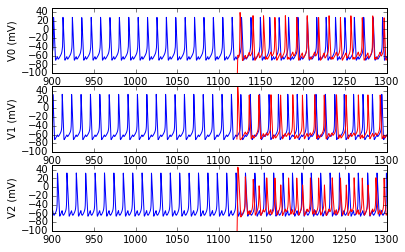

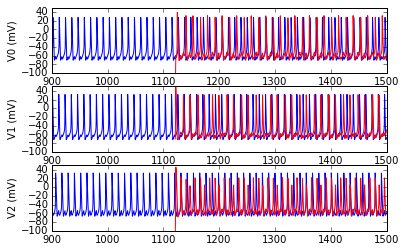

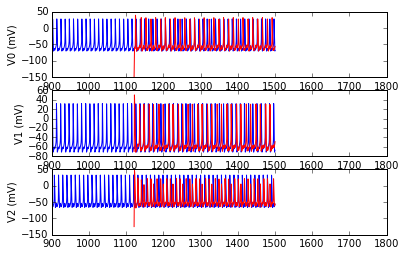

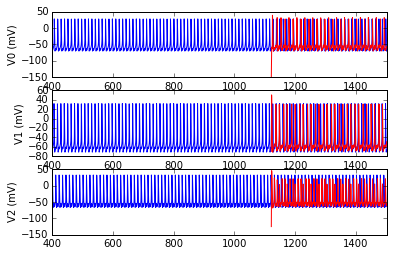

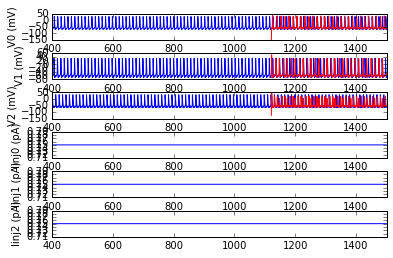

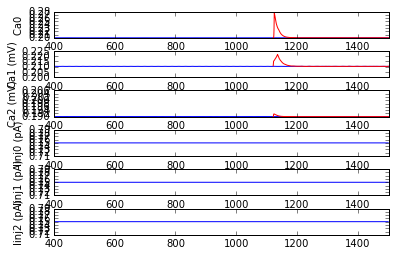

In [6]:
import scipy as sp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

% matplotlib inline

class network:
    def __init__(self):
        self.init = [-50.0, 0.1, 0.9, 0.1, 0.5, 0.5, 0.2, -50.0, 0.1, 0.9, 0.1, 0.5, 0.5, 0.2, \
                     -50.0, 0.1, 0.9, 0.1, 0.5, 0.5, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, \
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
        
        self.Tfinal = 1500.   
        self.dt = 0.1    # output time steps
#        print 'type init', type(self.init)
        self.newStart = 1121.1 # (3605*2+1)*0.1 + skip 4000*0.1 = 721.1 + 400 = 1121.1

        self.Date = '17apr13'
        self.Type = '_Quiesc_IinjSet3' # Dan Breen: t0m ~ 0.1 ms; t1m ~ 0.5; t0h ~ 1; t1h ~ 5; t0a ~ 1; t1a ~ 5; t0b ~ 1; t1b ~ 100
#        self.Type = '_Quiesc_IinjSet4_Beta27' # Dan Breen: t0m ~ 0.1 ms; t1m ~ 0.5; t0h ~ 1; t1h ~ 5; t0a ~ 1; t1a ~ 5; t0b ~ 1; t1b ~ 100

        self.injdt = 1.

        ### FOR WLC with Iinj's square:
        self.inj1 = sp.loadtxt('current_square.dat')
        self.inj2 = sp.loadtxt('current_square.dat')
        self.inj3 = sp.loadtxt('current_square.dat')

        ### For WLC with EL ~ -70.0 (the D.A. experiment with fabulous results)
        ##  Sets 1, 2, 3, 4, 5, respectively:
        self.Iscale0 = 0.4 #0.5  #0.5  #0.4  #.3  #0.1  #0.2
        self.Iscale1 = 0.5 #0.6  #0.6  #0.5  #.4  #0.1  #0.2
        self.Iscale2 = 0.3 #0.4  #0.3  #.3   #.2  #0.1  #0.2

        
        #  Works for WLC, for new t0a, t1a, t1b, and orig params EXCEPT El from -70 to -54 (fast rotation) 
        ### AND to -60 (slower rot).  Works also for Quiescence, and it's more interesting now - can see individual cell. diffs.
#        self.Iscale0 = 0.8
#        self.Iscale1 = 0.9
#        self.Iscale2 = 0.55  

        # Also works - faster WLC.  Less interesting differences among the cells, though.  Works for EL -65.

#        self.Iscale0 = .3  # OR 0.1
#        self.Iscale1 = .3  # OR 0.1
#        self.Iscale2 = .3  # OR 0.1
        
        # Also works for EL = -65.  And more interesting differences emerge among spiking for the 3 cells. 
#        self.Iscale0 = .5  
#        self.Iscale1 = .6  
#        self.Iscale2 = .4  

    
        ### FOR Iinj's chaotic, for EL ~ -65:
#        self.inj1 = sp.loadtxt('l63Ylower.dat')
#        self.inj2 = sp.loadtxt('l63Ylower_phaseOffset.dat')
#        self.inj3 = sp.loadtxt('l63Ylower_phaseOffset.dat')

#        self.Iscale0 = 45. # 90.  #1.0*120./3. 
#        self.Iscale1 = 25. # 50. #0.95*150./3. 
#        self.Iscale2 = 35. # 90. #0.98*180./3. #0.98*180./3. 
        
        ### FOR Iinj's chaotic, for EL ~ -70:
#        self.inj1 = sp.loadtxt('l63Xlower_phaseOffset.dat')
#        self.inj2 = sp.loadtxt('l63Ylower.dat')
#        self.inj3 = sp.loadtxt('l63Ylower_phaseOffset.dat')

#        self.Iscale0 = 1.0*120./3. 
#        self.Iscale1 = 0.95*150./3. 
#        self.Iscale2 = 1.*180./3.  

        ### ESTIMATED PARAMS for Meas_3V, gsAndEsynsVary, Alpha1pt5, dt0pt1, EL ~ -70., with quiescence gij values.  PATH1 ###
        ### BETA = 27 #
        
        self.init1 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., \
                      0., -1.48578100e+02, 1.24639800e-06, 9.99987700e-01, 4.79082900e-04, 3.25389200e-07, 9.99999700e-01, \
                      2.00001900e-01, -7.01299000e+01, 1.89337700e-02, 9.42153000e-01, 9.26142900e-02, 1.12082000e-01, \
                      9.90344900e-01, 2.10907500e-01, -1.24984600e+02, 3.38213900e-05, 9.99697800e-01, 2.72339500e-03, \
                      2.84618400e-06, 9.99998300e-01, 1.90001500e-01, 1.24522700e-03, 2.15875700e-03, 5.31124100e-03, \
                      4.19004000e-03, 6.69483200e-04, 9.67128000e-04]

        self.E01e = -81.92214 
        self.E02e = -83.92824
        self.E10e = -82.36786
        self.E12e = -81.60297        
        self.E20e = -82.46718
        self.E21e = -82.93885
        self.gL0e = 0.002921213
        self.gL1e = 0.003156902
        self.gL2e = 0.002743516
        self.gNa0e = 1.012711
        self.gNa1e = 0.9121988
        self.gNa2e = 0.9847935
        self.gK0e = 0.1720673
        self.gK1e = 0.2050121
        self.gK2e = 0.1196163 
        self.gCaT0e = 0.0001309589
        self.gCaT1e = 0.0001090664
        self.gCaT2e = 0.00009414734
        self.g01e = 0.02372648
        self.g02e = 0.042644
        self.g10e = 0.02813664
        self.g12e = 0.01705908
        self.g20e = 0.02009595
        self.g21e = 0.0331749

        ## BETA = 28
#gIonic VALUES at BETA 28
#E01=  -81.78534 E02=  -83.94334 E10=  -82.38853
#E12=  -81.51114 E20=  -82.50518 E21=  -82.9241
#gL0=  0.292348 gL1=  0.3159303 gL2=  0.2755662
#gNa0=  1.019233 gNa1=  0.9187605 gNa2=  0.9786685
#gK0=  0.173717 gK1=  0.206728 gK2=  0.1191276
#gCaT0=  0.1375701 gCaT1=  0.1090646 gCaT2=  0.09294229
#p01=  0.02357238 p02=  0.04262251 p10=  0.02822136
#p12=  0.01693165 p20=  0.01980329 p21=  0.03311728
        

#     gIonic VALUES at BETA 29
# E01=  -81.65165 E02=  -83.96261 E10=  -82.41925
# E12=  -81.40701 E20=  -82.54947 E21=  -82.9061
# gL0=  0.2925187 gL1=  0.3162005 gL2=  0.2767766
# gNa0=  1.027298 gNa1=  0.9294017 gNa2=  0.9747706
# gK0=  0.1756182 gK1=  0.2091618 gK2=  0.1190036
# gCaT0=  0.1458522 gCaT1=  0.1089319 gCaT2=  0.09152158
# p01=  0.02342929 p02=  0.04264387 p10=  0.0283458
# p12=  0.01680351 p20=  0.01948123 p21=  0.03304095
# gIonic VALUES at BETA 30
# E01=  -81.53781 E02=  -83.98581 E10=  -82.46524
# E12=  -81.29841 E20=  -82.59568 E21=  -82.88475
# gL0=  0.2926715 gL1=  0.3165099 gL2=  0.2779075
# gNa0=  1.036503 gNa1=  0.9405482 gNa2=  0.972759
# gK0=  0.1776903 gK1=  0.2115349 gK2=  0.1191988
# gCaT0=  0.1555183 gCaT1=  0.1089201 gCaT2=  0.09003787
# p01=  0.02331812 p02=  0.04270776 p10=  0.02853213
# p12=  0.0166973 p20=  0.01916182 p21=  0.03294753
    
# gIonic VALUES at BETA 31
# E01=  -81.45822 E02=  -84.01415 E10=  -82.53073
# E12=  -81.19295 E20=  -82.63505 E21=  -82.86084
# gL0=  0.2928305 gL1=  0.3168665 gL2=  0.2787497
# gNa0=  1.045139 gNa1=  0.9526632 gNa2=  0.9721382
# gK0=  0.1796237 gK1=  0.2139381 gK2=  0.1196331
# gCaT0=  0.1663277 gCaT1=  0.1091616 gCaT2=  0.08874103
# p01=  0.02325044 p02=  0.0428227 p10=  0.0288014
# p12=  0.01663186 p20=  0.01889281 p21=  0.03285114
# gIonic VALUES at BETA 32
# E01=  -81.42579 E02=  -84.04939 E10=  -82.62353
# E12=  -81.10017 E20=  -82.66115 E21=  -82.83658
# gL0=  0.293015 gL1=  0.3172965 gL2=  0.2792478
# gNa0=  1.053287 gNa1=  0.9668859 gNa2=  0.972175
# gK0=  0.181399 gK1=  0.2166214 gK2=  0.1201771
# gCaT0=  0.1779133 gCaT1=  0.1098484 gCaT2=  0.0878337
# p01=  0.02323368 p02=  0.04299944 p10=  0.02919285
# p12=  0.01662199 p20=  0.01870745 p21=  0.03276413
    
# gIonic VALUES at BETA 33
# E01=  -81.45443 E02=  -84.09185 E10=  -82.75025
# E12=  -81.03343 E20=  -82.67846 E21=  -82.81108
# gL0=  0.2932357 gL1=  0.3177812 gL2=  0.2796962
# gNa0=  1.061358 gNa1=  0.9833765 gNa2=  0.9716854
# gK0=  0.1830623 gK1=  0.2196366 gK2=  0.1206325
# gCaT0=  0.189981 gCaT1=  0.1112845 gCaT2=  0.0872975
# p01=  0.02327577 p02=  0.0432416 p10=  0.02975361
# p12=  0.01667991 p20=  0.01859165 p21=  0.03266386
# gIonic VALUES at BETA 34
# E01=  -81.55063 E02=  -84.14562 E10=  -82.91621
# E12=  -81.00389 E20=  -82.68838 E21=  -82.78251
# gL0=  0.2934879 gL1=  0.3183437 gL2=  0.2801754
# gNa0=  1.068361 gNa1=  1.002486 gNa2=  0.9670967
# gK0=  0.1844683 gK1=  0.2230485 gK2=  0.1204497
# gCaT0=  0.2021889 gCaT1=  0.1137235 gCaT2=  0.08721499
# p01=  0.0233747 p02=  0.04357678 p10=  0.02813664
# p12=  0.01679754 p20=  0.01854962 p21=  0.0331749

    
        
        # MODEL PARAMS ##
        self.gL0 = 0.003
        self.gNa0 = 1.2
        self.gK0 = 0.20 
        self.gL1 = 0.0033
        self.gNa1 = 1.0 
        self.gK1 = 0.22
        self.gL2 = 0.0029
        self.gNa2 = 1.4 
        self.gK2 = 0.17 
        
        self.EL0 = -70.  #-65.   
        self.ENa0 = 50.0 
        self.EK0 = -77.0 
        self.EL1 = -65.5  #-64.8 
        self.ENa1 = 50.5 
        self.EK1 = -76.5 
        self.EL2 = -70.5  #-65.2   
        self.ENa2 = 49.5 
        self.EK2 = -76.8 

        self.th_m0 = -40.0 
        self.th_h0 = -60.0 
        self.th_n0 = -55.0 
        self.sig_m0 = 16. 
        self.sig_h0 = -16.
        self.sig_n0 = 25. 
        self.t0_m0 = 0.1 
        self.t0_h0 = 1.0 
        self.t0_n0 = 1.0         
        self.t1_m0 = 0.4 
        self.t1_h0 = 7.0 
        self.t1_n0 = 5.0

        self.th_m1 = -40.5 #mV   # Cell 1 gets variations.
        self.th_h1 = -59.5 
        self.th_n1 = -54.5 
        self.sig_m1 = 15.5 
        self.sig_h1 = -15.6  
        self.sig_n1 = 24.5  
        self.t0_m1 = 0.11 
        self.t0_h1 = 1.01 
        self.t0_n1 = 0.99         
        self.t1_m1 = 0.41 
        self.t1_h1 = 6.9 
        self.t1_n1 = 4.9
        
        self.th_m2 = -40.2 #mV   # Cell 1 gets variations.
        self.th_h2 = -59.8 
        self.th_n2 = -55.5 
        self.sig_m2 = 16.5 
        self.sig_h2 = -16.6  
        self.sig_n2 = 24.3  
        self.t0_m2 = 0.09 
        self.t0_h2 = 1.02 
        self.t0_n2 = 0.97         
        self.t1_m2 = 0.43 
        self.t1_h2 = 7.2 
        self.t1_n2 = 5.1
        
        self.C0 = 0.01 # uF
        self.C1 = 0.011
        self.C2 = 0.009

##      Calcium  ##### - Again, cell0 gets standard value and cells 1 and 2 get tweaked.
        self.gCaT0 = 0.0001  # uS/uM
        self.gCaT1 = 0.00011  # uS/uM
        self.gCaT2 = 0.00009  # uS/uM
        self.gH0 = 0.#0.002  # BiolCybI scaled to Uri's g's
        self.gH1 = 0.#0.0019  # BiolCybI scaled to Uri's g's
        self.gH2 = 0.#0.0021 # BiolCybI scaled to Uri's g's

        self.EH0 = -40.
        self.th_a0 = -70. #-70.  # eve - EXTREMELY LOW ACTIVATION FOR CaT.
        self.th1_b0 = -65.   #-65.  ??
        self.th2_b0 = -65.   #-65.  ??
        self.th1_H0 = -60. #-75.   # Biol Cyb I
        self.th2_H0 = -60. #-75.   # Biol Cyb I
        self.sig_a0 =  10. #4.0  #15.  # eve: Daou has this on the order of sig_m.
        self.sig1_b0 = -10. #-0.3  # "
        self.sig2_b0 = -10. #-0.3  # "
        self.sig1_H0 = -11.  # Biol Cyb I
        self.sig2_H0 = 21.  # "
        self.t0_a0 = 1.  #0.1 # eve - mimicking CaL, for lack of a better idea
        self.t0_b0 = 1.  # ??
        self.t0_H0 = 0.1  # BiolCybI
        self.t1_a0 = 5.  #0.2 # eve - mimicking CaL, for lack of a better idea
        self.t1_b0 = 100. #5.  #100.  #5. # ??
        self.t1_H0 = 193.5  # BiolCybI
        self.CaExt = 2500.0 # uM
        self.k_s = 2.5 # uM
        self.eps_CaT = 1.  # Dimensionless
        self.phi0 = 0.06  #0.01 # uM/ms/nA
        self.t_Ca0 = 10. #50.0 # ms
        self.Ca00 = 0.2 # uM
        self.p = 2.0 #unitless. Exponent of hill fcn. Hardcoded in Arij model - EVE DOES NOT REMEMBER WHAT THIS IS FOR (15sep28)
        self.T = 290.0 #K . Temperature, Probably doesn't need to be estimated       

        self.EH1 = -40.5
        self.th_a1 = -70.5 #-70.  # eve - EXTREMELY LOW ACTIVATION FOR CaT.
        self.th1_b1 = -64.5   #-65.  ??
        self.th2_b1 = -64.5   #-65.  ??
        self.th1_H1 = -61. #-75.   # Biol Cyb I
        self.th2_H1 = -61. #-75.   # Biol Cyb I
        self.sig_a1 =  11. #4.0  #15.  # eve: Daou has this on the order of sig_m.
        self.sig1_b1 = -11. #-0.3  # "
        self.sig2_b1 = -11. #-0.3  # "
        self.sig1_H1 = -10.  # Biol Cyb I
        self.sig2_H1 = -20.  # "
        self.t0_a1 = 1.1  #0.11 # eve - mimicking CaL, for lack of a better idea
        self.t0_b1 = 1.1  # ??
        self.t0_H1 = 0.09  # BiolCybI
        self.t1_a1 = 5.21  #0.21 # eve - mimicking CaL, for lack of a better idea
        self.t1_b1 = 100.1  #5.1  #10.1  #100.1 
        self.t1_H1 = 199.5  # BiolCybI
        self.phi1 = 0.05  #0.01 # uM/ms/nA
        self.t_Ca1 = 13. #50.0 # ms
        self.Ca01 = 0.21 # uM

        self.EH2 = -41.
        self.th_a2 = -69. #-70.  # eve - EXTREMELY LOW ACTIVATION FOR CaT.
        self.th1_b2 = -65.2   #-65.  ??
        self.th2_b2 = -65.2   #-65.  ??
        self.th1_H2 = -59.5 #-75.   # Biol Cyb I
        self.th2_H2 = -59.5 #-75.   # Biol Cyb I
        self.sig_a2 =  9. #4.0  #15.  # eve: Daou has this on the order of sig_m.
        self.sig1_b2 = -9.2 #-0.3  # "
        self.sig2_b2 = -9.2 #-0.3  # "
        self.sig1_H2 = -12.  # Biol Cyb I
        self.sig2_H2 = -21.3  # "
        self.t0_a2 = 0.9  #0.09 # eve - mimicking CaL, for lack of a better idea
        self.t0_b2 = 0.9  # ??
        self.t0_H2 = 0.11  # BiolCybI
        self.t1_a2 = 5.19  #0.19 # eve - mimicking CaL, for lack of a better idea
        self.t1_b2 = 99. #4.9  #9.  #99. # ??
        self.t1_H2 = 180.5  # BiolCybI
        self.phi2 = 0.07  #0.01 # uM/ms/nA
        self.t_Ca2 = 9. #50.0 # ms
        self.Ca02 = 0.19 # uM

####    End Ca params #####        
        
        self.Tmax0 = 1.5 #mM  # GGA1
        self.Vp0 = 2.   # mV  
        self.Kp0 = 5.0   #mV
        self.Tmax1 = 1.49 #mM  # GGA1
        self.Vp1 = 2.01   # mV  
        self.Kp1 = 5.01   #mV
        self.Tmax2 = 1.51 #mM  # GGA1
        self.Vp2 = 2.03   # mV  
        self.Kp2 = 4.8   #mV
        
        ## QUIESCENCE
#        self.g00, self.g01, self.g02  = 0.0, 0.0250, 0.0400   # uS
#        self.g10, self.g11, self.g12 = 0.0280, 0.0, 0.0180    
#        self.g20, self.g21, self.g22 = 0.0210, 0.0320, 0.0

        ## ACTIVE
        self.g00, self.g01, self.g02  = 0.0, 0.0250, 0.0400   # uS
        self.g10, self.g11, self.g12 = 0.0280, 0.0, 0.0180    
        self.g20, self.g21, self.g22 = 0.0210, 0.0320, 0.0
        
        self.E00, self.E01, self.E02 = 0.0, -83.0, -83.3 # mV # Erev_inh = -83.0; GGA1
        self.E10, self.E11, self.E12 = -82.7, 0.0, -82.5 # mV # Erev_exc = 0; GGA1
        self.E20, self.E21, self.E22 = -83.2, -82.9, 0.0
        
        self.a00, self.a01, self.a02 = 0.0, 1.0, 1.1   # mM-1 ms-1 # Alpha_exc, beta_exc onto HVCI: 2.2, 0.38
        self.a10, self.a11, self.a12 = 1.05, 0.0, 1.9  # Alpha_exc, beta_exc onto HVCRA: 1.1, 0.19
        self.a20, self.a21, self.a22 = 1.2, 1.8, 0.0 # Alpha_inh, beta_inh = 5.0, 0.18

        self.b00, self.b01, self.b02 = 0.0, 0.18, 0.181  # ms-1
        self.b10, self.b11, self.b12 = 0.182, 0.0, 0.179
        self.b20, self.b21, self.b22 = 0.178, 0.183, 0.0

        
        self.synSpeed = 1.    # To adjust relative speeds of gating var action.  Synaptic gating var is much too slow.
        
    # CURRENTS: IONIC #    
    def I_Na(self,g,V,m,h,ENa): return g * m**3 * h * (ENa-V)

    def I_K(self,g,V,n,EK): return g * n**4 * (EK-V)

    def I_L(self, g, Erev, V): return g * (Erev - V)

    def I_CaT(self, g, V, Ca,a,b):
        if V == 0.0:
            return -12.5
        else:
            return (g * V * a**3 * b**3 
                *(Ca- self.CaExt*sp.exp(-V/12.5))/(sp.exp(-V/12.5)-1))
    
    def I_h(self,g,V,H,EH):
        return g * H**2 * (EH - V)
    
    def gating_inf(self, V,theta,sigma): return 0.5*(1.0+sp.tanh((V-theta)/sigma))

    def tauT0(self, V,t0,t1,theta,sigma):  return t0

    def tauSq(self, V,t0,t1,theta,sigma):
        return t0 + t1*(1.0-(sp.tanh((V-theta)/(sigma)))**2)

    def tauNoSq(self, V,t0,t1,theta,sigma):
        return t0 + t1*(1.0+sp.tanh((V-theta)/(sigma)))

    
    ## CURRENTS: synaptic ##
    
    def I_syn(self, g, E, V, s): return g * s * (E-V) 
    
#    def Conc(self, Vpre,Tmax,Vp,Kp): 
#        if Vpre - Vp < 0:
#            return 1 - Tmax/(1.0 + math.exp((Vpre-Vp)/Kp))
#        else:
#            return Tmax / (1.0 + math.exp(-(Vpre - Vp)/Kp))

    def Conc(self, Vpre,Tmax,Vp,Kp): 
        return Tmax / (1.0 + math.exp(-(Vpre - Vp)/Kp))

    
    def Iinj(self, t, Ivalue, step): 
        idx = int(t/step)
        if idx == t/step:
            return Ivalue[idx]
        else:
            slope = (Ivalue[idx+1]-Ivalue[idx])/step               
            return Ivalue[idx] + slope*(t-idx*step)    
    
    def eqns(self,x, t, current1, tstep1, current2, tstep2, current3, tstep3):
        V0, m0, h0, n0, a0, b0, CA0, V1, m1, h1, n1, a1, b1, CA1, V2, m2, h2, n2, a2, b2, CA2, s01, s02, s10, s12, s20, s21, \
        V0e, m0e, h0e, n0e, a0e, b0e, CA0e, V1e, m1e, h1e, n1e, a1e, b1e, CA1e, V2e, m2e, h2e, n2e, a2e, b2e, CA2e, s01e, s02e, \
        s10e, s12e, s20e, s21e = x

        dV0dt = 1.0/self.C0 * (self.I_L(self.gL0, self.EL0, V0) 
                              + self.I_Na(self.gNa0,V0,m0,h0,self.ENa0) + self.I_K(self.gK0,V0,n0,self.EK0)
                              + self.I_CaT(self.gCaT0,V0,CA0,a0,b0) 
                              + self.Iinj(t,current1,tstep1)/self.Iscale0
                              + self.I_syn(self.g01, self.E01, V0, s01) + self.I_syn(self.g02, self.E02, V0, s02))

        dm0dt = ((self.gating_inf(V0,self.th_m0,self.sig_m0)-m0)/ self.tauSq(V0,self.t0_m0,self.t1_m0,self.th_m0,self.sig_m0))
        dh0dt = ((self.gating_inf(V0,self.th_h0,self.sig_h0)-h0)/ self.tauSq(V0,self.t0_h0,self.t1_h0,self.th_h0,self.sig_h0))
        dn0dt = ((self.gating_inf(V0,self.th_n0,self.sig_n0)-n0)/ self.tauSq(V0,self.t0_n0,self.t1_n0,self.th_n0,self.sig_n0))
        da0dt = ((self.gating_inf(V0,self.th_a0,self.sig_a0)-a0) / self.tauSq(V0,self.t0_a0,self.t1_a0,self.th_a0,self.sig_a0))
        db0dt = ((self.gating_inf(V0,self.th1_b0,self.sig1_b0)-b0) / self.tauSq(V0,self.t0_b0,self.t1_b0,self.th2_b0,self.sig2_b0))

        dCa0dt = self.phi0*(self.eps_CaT*self.I_CaT(self.gCaT0,V0,CA0,a0,b0)) + (self.Ca00 - CA0)/self.t_Ca0
                
        
        dV1dt = 1.0/self.C1 * (self.I_L(self.gL1, self.EL1, V1) 
                              + self.I_Na(self.gNa1,V1,m1,h1,self.ENa1) + self.I_K(self.gK1,V1,n1,self.EK1)
                              + self.Iinj(t,current2,tstep2)/self.Iscale1
                              + self.I_CaT(self.gCaT1,V1,CA1,a1,b1) 
                              + self.I_syn(self.g10, self.E10, V1, s10) + self.I_syn(self.g12, self.E12, V1, s12))

        dm1dt = ((self.gating_inf(V1,self.th_m1,self.sig_m1)-m1)/ self.tauSq(V1,self.t0_m1,self.t1_m1,self.th_m1,self.sig_m1))
        dh1dt = ((self.gating_inf(V1,self.th_h1,self.sig_h1)-h1)/ self.tauSq(V1,self.t0_h1,self.t1_h1,self.th_h1,self.sig_h1))
        dn1dt = ((self.gating_inf(V1,self.th_n1,self.sig_n1)-n1)/ self.tauSq(V1,self.t0_n1,self.t1_n1,self.th_n1,self.sig_n1))
        da1dt = ((self.gating_inf(V1,self.th_a1,self.sig_a1)-a1) / self.tauSq(V1,self.t0_a1,self.t1_a1,self.th_a1,self.sig_a1))
        db1dt = ((self.gating_inf(V1,self.th1_b1,self.sig1_b1)-b1) / self.tauSq(V1,self.t0_b1,self.t1_b1,self.th2_b1,self.sig2_b1))

        dCa1dt = self.phi1*(self.eps_CaT*self.I_CaT(self.gCaT1,V1,CA1,a1,b1)) + (self.Ca01 - CA1)/self.t_Ca1
        
        
        dV2dt = 1.0/self.C2 * (self.I_L(self.gL2, self.EL2, V2) 
                              + self.I_Na(self.gNa2,V2,m2,h2,self.ENa2) + self.I_K(self.gK2,V2,n2,self.EK2)
                              + self.I_CaT(self.gCaT2,V2,CA2,a2,b2) 
                              + self.Iinj(t,current3,tstep3)/self.Iscale2
                              + self.I_syn(self.g20, self.E20, V2, s20) + self.I_syn(self.g21, self.E21, V2, s21))

        dm2dt = ((self.gating_inf(V2,self.th_m2,self.sig_m2)-m2)/ self.tauSq(V2,self.t0_m2,self.t1_m2,self.th_m2,self.sig_m2))
        dh2dt = ((self.gating_inf(V2,self.th_h2,self.sig_h2)-h2)/ self.tauSq(V2,self.t0_h2,self.t1_h2,self.th_h2,self.sig_h2))
        dn2dt = ((self.gating_inf(V2,self.th_n2,self.sig_n2)-n2)/ self.tauSq(V2,self.t0_n2,self.t1_n2,self.th_n2,self.sig_n2))
        da2dt = ((self.gating_inf(V2,self.th_a2,self.sig_a2)-a2) / self.tauSq(V2,self.t0_a2,self.t1_a2,self.th_a2,self.sig_a2))
        db2dt = ((self.gating_inf(V2,self.th1_b2,self.sig1_b2)-b2) / self.tauSq(V2,self.t0_b2,self.t1_b2,self.th2_b2,self.sig2_b2))
 
        dCa2dt = self.phi2*(self.eps_CaT*self.I_CaT(self.gCaT2,V2,CA2,a2,b2)) + (self.Ca02 - CA2)/self.t_Ca2
 
        
      ## SYNAPSES ##
        ds01dt = (self.synSpeed *self.a01 * self.Conc(V1,self.Tmax1,self.Vp1,self.Kp1) * (1. - s01) - self.synSpeed *self.b01 * s01)
        ds02dt = (self.synSpeed *self.a02 * self.Conc(V2,self.Tmax2,self.Vp2,self.Kp2) * (1. - s02) - self.synSpeed *self.b02 * s02)
        ds10dt = (self.synSpeed *self.a10 * self.Conc(V0,self.Tmax0,self.Vp0,self.Kp0) * (1. - s10) - self.synSpeed *self.b10 * s10)
        ds12dt = (self.synSpeed *self.a12 * self.Conc(V2,self.Tmax2,self.Vp2,self.Kp2) * (1. - s12) - self.synSpeed *self.b12 * s12)
        ds20dt = (self.synSpeed *self.a20 * self.Conc(V0,self.Tmax0,self.Vp0,self.Kp0) * (1. - s20) - self.synSpeed *self.b20 * s20)
        ds21dt = (self.synSpeed *self.a21 * self.Conc(V1,self.Tmax1,self.Vp1,self.Kp1) * (1. - s21) - self.synSpeed *self.b21 * s21)

        ########################
        ### ESTIMATED MODEL ####
        
        dV0dte = 1.0/self.C0 * (self.I_L(self.gL0e, self.EL0, V0e) 
                              + self.I_Na(self.gNa0e,V0e,m0e,h0e,self.ENa0) + self.I_K(self.gK0e,V0e,n0e,self.EK0)
                              + self.I_CaT(self.gCaT0e,V0e,CA0e,a0e,b0e) 
                              + self.Iinj(t,current1,tstep1)/self.Iscale0
                              + self.I_syn(self.g01e, self.E01e, V0e, s01e) + self.I_syn(self.g02e, self.E02e, V0e, s02e))

        dm0dte = ((self.gating_inf(V0e,self.th_m0,self.sig_m0)-m0e)/ self.tauSq(V0e,self.t0_m0,self.t1_m0,self.th_m0,self.sig_m0))
        dh0dte = ((self.gating_inf(V0e,self.th_h0,self.sig_h0)-h0e)/ self.tauSq(V0e,self.t0_h0,self.t1_h0,self.th_h0,self.sig_h0))
        dn0dte = ((self.gating_inf(V0e,self.th_n0,self.sig_n0)-n0e)/ self.tauSq(V0e,self.t0_n0,self.t1_n0,self.th_n0,self.sig_n0))
        da0dte = ((self.gating_inf(V0e,self.th_a0,self.sig_a0)-a0e) / self.tauSq(V0e,self.t0_a0,self.t1_a0,self.th_a0,self.sig_a0))
        db0dte = ((self.gating_inf(V0e,self.th1_b0,self.sig1_b0)-b0e) / self.tauSq(V0e,self.t0_b0,self.t1_b0,self.th2_b0,self.sig2_b0))

        dCa0dte = self.phi0*(self.eps_CaT*self.I_CaT(self.gCaT0e,V0e,CA0e,a0e,b0e)) + (self.Ca00 - CA0e)/self.t_Ca0
                
        
        dV1dte = 1.0/self.C1 * (self.I_L(self.gL1e, self.EL1, V1e) 
                              + self.I_Na(self.gNa1e,V1e,m1e,h1e,self.ENa1) + self.I_K(self.gK1e,V1e,n1e,self.EK1)
                              + self.Iinj(t,current2,tstep2)/self.Iscale1
                              + self.I_CaT(self.gCaT1e,V1e,CA1e,a1e,b1e) 
                              + self.I_syn(self.g10e, self.E10e, V1e, s10e) + self.I_syn(self.g12e, self.E12e, V1e, s12e))

        dm1dte = ((self.gating_inf(V1e,self.th_m1,self.sig_m1)-m1e)/ self.tauSq(V1e,self.t0_m1,self.t1_m1,self.th_m1,self.sig_m1))
        dh1dte = ((self.gating_inf(V1e,self.th_h1,self.sig_h1)-h1e)/ self.tauSq(V1e,self.t0_h1,self.t1_h1,self.th_h1,self.sig_h1))
        dn1dte = ((self.gating_inf(V1e,self.th_n1,self.sig_n1)-n1e)/ self.tauSq(V1e,self.t0_n1,self.t1_n1,self.th_n1,self.sig_n1))
        da1dte = ((self.gating_inf(V1e,self.th_a1,self.sig_a1)-a1e) / self.tauSq(V1e,self.t0_a1,self.t1_a1,self.th_a1,self.sig_a1))
        db1dte = ((self.gating_inf(V1e,self.th1_b1,self.sig1_b1)-b1e) / self.tauSq(V1e,self.t0_b1,self.t1_b1,self.th2_b1,self.sig2_b1))

        dCa1dte = self.phi1*(self.eps_CaT*self.I_CaT(self.gCaT1e,V1e,CA1e,a1e,b1e)) + (self.Ca01 - CA1e)/self.t_Ca1
        
        
        dV2dte = 1.0/self.C2 * (self.I_L(self.gL2e, self.EL2, V2e) 
                              + self.I_Na(self.gNa2e,V2e,m2e,h2e,self.ENa2) + self.I_K(self.gK2e,V2e,n2e,self.EK2)
                              + self.I_CaT(self.gCaT2e,V2e,CA2e,a2e,b2e) 
                              + self.Iinj(t,current3,tstep3)/self.Iscale2
                              + self.I_syn(self.g20e, self.E20e, V2e, s20e) + self.I_syn(self.g21e, self.E21e, V2e, s21e))

        dm2dte = ((self.gating_inf(V2e,self.th_m2,self.sig_m2)-m2e)/ self.tauSq(V2e,self.t0_m2,self.t1_m2,self.th_m2,self.sig_m2))
        dh2dte = ((self.gating_inf(V2e,self.th_h2,self.sig_h2)-h2e)/ self.tauSq(V2e,self.t0_h2,self.t1_h2,self.th_h2,self.sig_h2))
        dn2dte = ((self.gating_inf(V2e,self.th_n2,self.sig_n2)-n2e)/ self.tauSq(V2e,self.t0_n2,self.t1_n2,self.th_n2,self.sig_n2))
        da2dte = ((self.gating_inf(V2e,self.th_a2,self.sig_a2)-a2e) / self.tauSq(V2e,self.t0_a2,self.t1_a2,self.th_a2,self.sig_a2))
        db2dte = ((self.gating_inf(V2e,self.th1_b2,self.sig1_b2)-b2e) / self.tauSq(V2e,self.t0_b2,self.t1_b2,self.th2_b2,self.sig2_b2))
 
        dCa2dte = self.phi2*(self.eps_CaT*self.I_CaT(self.gCaT2e,V2e,CA2e,a2e,b2e)) + (self.Ca02 - CA2e)/self.t_Ca2
 
        
      ## SYNAPSES ##
        ds01dte = (self.synSpeed *self.a01 * self.Conc(V1e,self.Tmax1,self.Vp1,self.Kp1) * (1. - s01e) - self.synSpeed *self.b01 * s01e)
        ds02dte = (self.synSpeed *self.a02 * self.Conc(V2e,self.Tmax2,self.Vp2,self.Kp2) * (1. - s02e) - self.synSpeed *self.b02 * s02e)
        ds10dte = (self.synSpeed *self.a10 * self.Conc(V0e,self.Tmax0,self.Vp0,self.Kp0) * (1. - s10e) - self.synSpeed *self.b10 * s10e)
        ds12dte = (self.synSpeed *self.a12 * self.Conc(V2e,self.Tmax2,self.Vp2,self.Kp2) * (1. - s12e) - self.synSpeed *self.b12 * s12e)
        ds20dte = (self.synSpeed *self.a20 * self.Conc(V0e,self.Tmax0,self.Vp0,self.Kp0) * (1. - s20e) - self.synSpeed *self.b20 * s20e)
        ds21dte = (self.synSpeed *self.a21 * self.Conc(V1e,self.Tmax1,self.Vp1,self.Kp1) * (1. - s21e) - self.synSpeed *self.b21 * s21e)        
        
        return dV0dt, dm0dt, dh0dt, dn0dt, da0dt, db0dt, dCa0dt, dV1dt, dm1dt, dh1dt, dn1dt, da1dt, db1dt, dCa1dt, \
    dV2dt, dm2dt, dh2dt, dn2dt, da2dt, db2dt, dCa2dt, ds01dt, ds02dt, ds10dt, ds12dt, ds20dt, ds21dt, \
    dV0dte, dm0dte, dh0dte, dn0dte, da0dte, db0dte, dCa0dte, dV1dte, dm1dte, dh1dte, dn1dte, da1dte, db1dte, dCa1dte, \
    dV2dte, dm2dte, dh2dte, dn2dte, da2dte, db2dte, dCa2dte, ds01dte, ds02dte, ds10dte, ds12dte, ds20dte, ds21dte
        
    def run(self):
    
        self.times = sp.arange(0,self.Tfinal,self.dt)
        self.sim = odeint(self.eqns,self.init,self.times,(self.inj1,self.injdt,self.inj2,self.injdt,self.inj3,self.injdt))
        self.times1 = sp.arange(self.newStart,self.Tfinal,self.dt)
        self.sim1 = odeint(self.eqns,self.init1,self.times1,(self.inj1,self.injdt,self.inj2,self.injdt, self.inj3,self.injdt))

#        sp.savetxt('sim_NaKLCaT_dt%s%s_%s.txt' % (self.dt, self.Type, self.Date), sp.column_stack((self.times,self.sim)))
#        sp.savetxt('sim_dt%s_%s.txt' % (self.dt, self.Date),sp.column_stack((self.times,self.sim[:,0])))
        sp.savetxt('V0_NaKLCaT_Model_dt%s%s_%s.dat' % (self.dt, self.Type, self.Date),self.sim[:,0])
        sp.savetxt('V0_NaKLCaT_Test_dt%s%s_%s.dat' % (self.dt, self.Type, self.Date),self.sim1[:,27])
#        sp.savetxt('m0_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,1])
#        sp.savetxt('h0_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,2])
#        sp.savetxt('n0_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,3])        
#        sp.savetxt('a0_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,4])    
#        sp.savetxt('b0_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,5])
#        sp.savetxt('Hy0_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,6])
        sp.savetxt('Ca0_NaKLCaT_Model_dt%s%s_%s.dat' % (self.dt, self.Type, self.Date),self.sim[:,6])
        sp.savetxt('Ca0_NaKLCaT_Test_dt%s%s_%s.dat' % (self.dt, self.Type, self.Date),self.sim1[:,33])
        
        sp.savetxt('V1_NaKLCaT_Model_dt%s%s_%s.dat' % (self.dt, self.Type, self.Date),self.sim[:,7])
        sp.savetxt('V1_NaKLCaT_Test_dt%s%s_%s.dat' % (self.dt, self.Type, self.Date),self.sim1[:,34])
#        sp.savetxt('m1_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,9])
#        sp.savetxt('h1_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,10])
#        sp.savetxt('n1_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,11])        
#        sp.savetxt('a1_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,12])    
#        sp.savetxt('b1_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,13])
#        sp.savetxt('Hy1_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,14])        
        sp.savetxt('Ca1_NaKLCaT_Model_dt%s%s_%s.dat' % (self.dt, self.Type, self.Date),self.sim[:,13])
        sp.savetxt('Ca1_NaKLCaT_Test_dt%s%s_%s.dat' % (self.dt, self.Type, self.Date),self.sim1[:,40])

        sp.savetxt('V2_NaKLCaT_Model_dt%s%s_%s.dat' % (self.dt, self.Type, self.Date),self.sim[:,14])
        sp.savetxt('V2_NaKLCaT_Test_dt%s%s_%s.dat' % (self.dt, self.Type, self.Date),self.sim1[:,41])
#        sp.savetxt('m2_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,17])
#        sp.savetxt('h2_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,18])
#        sp.savetxt('n2_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,19])        
#        sp.savetxt('a2_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,20])    
#        sp.savetxt('b2_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,21])
#        sp.savetxt('Hy2_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,22])         
        sp.savetxt('Ca2_NaKLCaT_Model_dt%s%s_%s.dat' % (self.dt, self.Type, self.Date),self.sim[:,21])        
        sp.savetxt('Ca2_NaKLCaT_Test_dt%s%s_%s.dat' % (self.dt, self.Type, self.Date),self.sim1[:,47])


#        sp.savetxt('s01_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,24])
#        sp.savetxt('s02_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,25])
#        sp.savetxt('s10_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,26])
#        sp.savetxt('s12_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,27])        
#        sp.savetxt('s20_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,28])    
#        sp.savetxt('s21_dt%s_%s.dat' % (self.dt, self.Date),self.sim[:,29])

        tmplen = int(self.Tfinal/self.dt)
        tmpcur1 = sp.zeros(tmplen)
        tmpcur2 = sp.zeros(tmplen)
        tmpcur3 = sp.zeros(tmplen)
        tmptime = sp.arange(tmplen)
        for a in tmptime:
            tmpcur1[a] = self.inj1[a*self.dt]
            tmpcur2[a] = self.inj2[a*self.dt]
            tmpcur3[a] = self.inj3[a*self.dt]
#        sp.savetxt('scaled_Iinj_andTimes_15oct07.dat',sp.column_stack((self.times,tmpcur1)))
            #        sp.savetxt("scaled_Iinj1_dt002_InjsV_gSynsV1_gIonsV_negI.dat", tmpcur1)
#        sp.savetxt("Iinj0_dt%s_%s.dat" % (self.dt, self.Date), tmpcur1)
#        sp.savetxt("Iinj1_dt%s_%s.dat" % (self.dt, self.Date), tmpcur2)
#        sp.savetxt("Iinj2_dt%s_%s.dat" % (self.dt, self.Date), tmpcur3)
        print 'GOT HERE.'
            
    def plot(self):
        sim = self.sim
        times = self.times
        sim1 = self.sim1
        times1 = self.times1
        inj1 = self.inj1
        inj2 = self.inj2
        inj3 = self.inj3
        injdt = self.injdt    

        fig9 = plt.figure(0)
        fig9.subplots_adjust(hspace=0.2)
        plt.subplot(311)
        plt.xlim([900,1300])
        plt.ylim([-100,50]) 
        plt.ylabel("V0 (mV)")
#        plt.plot(times,sim[:,0],'g--',linewidth=3.5)        
        plt.plot(times,sim[:,0],'b')
        plt.plot(times1,sim1[:,27],'r')
        plt.subplot(312)
        plt.xlim([900,1300])
        plt.ylim([-100,50]) 
        plt.ylabel('V1 (mV)')
#        plt.plot(times,sim[:,7],'g--',linewidth=3.5)        
        plt.plot(times,sim[:,7],'b')
        plt.plot(times1,sim1[:,34],'r')
        plt.subplot(313)
        plt.xlim([900,1300])
        plt.ylim([-100,50])         
        plt.ylabel('V2 (mV)')
#        plt.plot(times,sim[:,14],'g--',linewidth=3.5)
        plt.plot(times,sim[:,14],'b')
        plt.plot(times1,sim1[:,41],'r')
        plt.show()
        fig9.savefig('Vs_NaKLCaT_Predict%s_%s_zoomZoomZoom.png' % (self.Type, self.Date),dpi=900)

        
        fig8 = plt.figure(0)
        fig8.subplots_adjust(hspace=0.2)
        plt.subplot(311)
        plt.xlim([900,1500])
        plt.ylim([-100,50]) 
        plt.ylabel("V0 (mV)")
#        plt.plot(times,sim[:,0],'g--',linewidth=3.5)
        plt.plot(times,sim[:,0],'b')
        plt.plot(times1,sim1[:,27],'r')
        plt.subplot(312)
        plt.xlim([900,1500])
        plt.ylim([-100,50]) 
        plt.ylabel('V1 (mV)')
#        plt.plot(times,sim[:,7],'g--',linewidth=3.5)
        plt.plot(times,sim[:,7],'b')
        plt.plot(times1,sim1[:,34],'r')
        plt.subplot(313)
        plt.xlim([900,1500])
        plt.ylim([-100,50]) 
        plt.ylabel('V2 (mV)')
#        plt.plot(times,sim[:,14],'g--',linewidth=3.5)
        plt.plot(times,sim[:,14],'b')
        plt.plot(times1,sim1[:,41],'r')
        plt.show()
        fig8.savefig('Vs_NaKLCaT_Predict%s_%s_zoomZoom.png' % (self.Type, self.Date),dpi=900)

        
        fig7 = plt.figure(0)
        fig7.subplots_adjust(hspace=0.2)
        plt.subplot(311)
        plt.xlim([900,1800])
        plt.ylabel("V0 (mV)")
#        plt.plot(times,sim[:,0],'g--',linewidth=3.5)
        plt.plot(times,sim[:,0],'b')
        plt.plot(times1,sim1[:,27],'r')
        plt.subplot(312)
        plt.xlim([900,1800])
        plt.ylabel('V1 (mV)')
#        plt.plot(times,sim[:,7],'g--',linewidth=3.5)
        plt.plot(times,sim[:,7],'b')
        plt.plot(times1,sim1[:,34],'r')
        plt.subplot(313)
        plt.xlim([900,1800])
        plt.ylabel('V2 (mV)')
#        plt.plot(times,sim[:,14],'g--',linewidth=3.5)
        plt.plot(times,sim[:,14],'b')
        plt.plot(times1,sim1[:,41],'r')
        plt.show()
        fig7.savefig('Vs_NaKLCaT_Predict%s_%s_zoom.png' % (self.Type, self.Date),dpi=900)
        
        fig5 = plt.figure(0)
        fig5.subplots_adjust(hspace=0.2)
        plt.subplot(311)
        plt.xlim([400,self.Tfinal])
        plt.ylabel("V0 (mV)")
#        plt.plot(times,sim[:,0],'g--',linewidth=3.5)
        plt.plot(times,sim[:,0],'b')
        plt.plot(times1,sim1[:,27],'r')
        plt.subplot(312)
        plt.xlim([400,self.Tfinal])
        plt.ylabel('V1 (mV)')
#        plt.plot(times,sim[:,7],'g--',linewidth=3.5)
        plt.plot(times,sim[:,7],'b')
        plt.plot(times1,sim1[:,34],'r')
        plt.subplot(313)
        plt.xlim([400,self.Tfinal])
        plt.ylabel('V2 (mV)')
#        plt.plot(times,sim[:,14],'g--',linewidth=3.5)
        plt.plot(times,sim[:,14],'b')
        plt.plot(times1,sim1[:,41],'r')
        plt.show()
        fig5.savefig('Vs_NaKLCaT_Predict%s_%s.png' % (self.Type, self.Date),dpi=900)
        
        fig0 = plt.figure(0)
        fig0.subplots_adjust(hspace=0.5)
        plt.subplot(611)
        plt.ylabel("V0 (mV)")
        plt.xlim([400,self.Tfinal])
#        plt.plot(times,sim[:,0],'g--',linewidth=3.5)
        plt.plot(times,sim[:,0],'b')
        plt.plot(times1,sim1[:,27],'r')
        plt.subplot(612)
        plt.xlim([400,self.Tfinal])
        plt.ylabel('V1 (mV)')
#        plt.plot(times,sim[:,7],'g--',linewidth=3.5)
        plt.plot(times,sim[:,7],'b')
        plt.plot(times1,sim1[:,34],'r')
        plt.subplot(613)
        plt.xlim([400,self.Tfinal])
        plt.ylabel('V2 (mV)')
#        plt.plot(times,sim[:,14],'g--',linewidth=3.5)
        plt.plot(times,sim[:,14],'b')
        plt.plot(times1,sim1[:,41],'r')
        plt.subplot(614)
        plt.xlim([400,self.Tfinal])
        plt.ylabel("Iinj0 (pA)")
        ttmp = sp.arange(0,self.Tfinal,self.injdt)   # Uri's strategy 
        plt.plot(ttmp, self.inj1[:len(ttmp)]/self.Iscale0)  # Uri's strategy        
        plt.subplot(615)
        plt.xlim([400,self.Tfinal])
        plt.ylabel("Iinj1 (pA)")
        ttmp = sp.arange(0,self.Tfinal,self.injdt)   # Uri's strategy 
        plt.plot(ttmp, self.inj2[:len(ttmp)]/self.Iscale0)  # Uri's strategy        
        plt.subplot(616)
        plt.xlim([400,self.Tfinal])
        plt.ylabel("Iinj2 (pA)")
        ttmp = sp.arange(0,self.Tfinal,self.injdt)   # Uri's strategy 
        plt.plot(ttmp, self.inj3[:len(ttmp)]/self.Iscale0)  # Uri's strategy        
        plt.show()
        fig0.savefig('Vs_NaKLCaT%s_andIinjs_%s.png' % (self.Type, self.Date))

        fig6 = plt.figure(0)
        fig6.subplots_adjust(hspace=0.5)
        plt.subplot(611)
        plt.xlim([400,self.Tfinal])
        plt.ylabel("Ca0 ")
#        plt.plot(times,sim[:,6],'g--',linewidth=3.5)
        plt.plot(times,sim[:,6],'b')
        plt.plot(times1,sim1[:,33],'r')
        plt.subplot(612)
        plt.xlim([400,self.Tfinal])
        plt.ylabel('Ca1 (mV)')
#        plt.plot(times,sim[:,13],'g--',linewidth=3.5)
        plt.plot(times,sim[:,13],'b')
        plt.plot(times1,sim1[:,40],'r')
        plt.subplot(613)
        plt.xlim([400,self.Tfinal])
        plt.ylabel('Ca2 (mV)')
#        plt.plot(times,sim[:,20],'g--',linewidth=3.5)
        plt.plot(times,sim[:,20],'b')
        plt.plot(times1,sim1[:,47],'r')
        plt.subplot(614)
        plt.xlim([400,self.Tfinal])
        plt.ylabel("Iinj0 (pA)")
        ttmp = sp.arange(0,self.Tfinal,self.injdt)   # Uri's strategy 
        plt.plot(ttmp, self.inj1[:len(ttmp)]/self.Iscale0)  # Uri's strategy        
        plt.subplot(615)
        plt.xlim([400,self.Tfinal])
        plt.ylabel("Iinj1 (pA)")
        ttmp = sp.arange(0,self.Tfinal,self.injdt)   # Uri's strategy 
        plt.plot(ttmp, self.inj2[:len(ttmp)]/self.Iscale0)  # Uri's strategy        
        plt.subplot(616)
        plt.xlim([400,self.Tfinal])
        plt.ylabel("Iinj2 (pA)")
        ttmp = sp.arange(0,self.Tfinal,self.injdt)   # Uri's strategy 
        plt.plot(ttmp, self.inj3[:len(ttmp)]/self.Iscale0)  # Uri's strategy        
        plt.show()
        fig0.savefig('Cas_NaKLCaT%s_andIinjs_%s.png' % (self.Type, self.Date))




#         fig4, ax4 = plt.subplots(2,3,sharex=True)
#         ax4[0,0].set_title('s01')
#         ax4[0,0].plot(times,sim[:,21])
#         ax4[0,1].set_title('s02')
#         ax4[0,1].plot(times,sim[:,22])
#         ax4[0,2].set_title('s10')
#         ax4[0,2].plot(times,sim[:,23])        
#         ax4[1,0].set_title('s12')
#         ax4[1,0].plot(times,sim[:,24])
#         ax4[1,1].set_title('s20')
#         ax4[1,1].plot(times,sim[:,25])
#         ax4[1,2].set_title('s21')
#         ax4[1,2].plot(times,sim[:,26])
#         plt.show()
# #        fig4.savefig('synGatingVars_NaKLCaT_dt002_InjsV_gSynsV1_gIonsV.png')
        
#         fig1, ax1 = plt.subplots(3,4,sharex=True)
#         ax1[0,0].set_title('V 0')
#         ax1[0,0].plot(times,sim[:,0])
#         ax1[0,1].set_title('m 0')
#         ax1[0,1].plot(times,sim[:,1])
#         ax1[1,0].set_title('h 0')
#         ax1[1,0].plot(times,sim[:,2])
#         ax1[1,1].set_title('n 0')
#         ax1[1,1].plot(times,sim[:,3])
#         ax1[2,0].set_title('I_inj')
#         ttmp = sp.arange(0,self.Tfinal,self.injdt)   # Uri's strategy 
#         ax1[2,0].plot(ttmp, self.inj1[:len(ttmp)]/self.Iscale0)  # Uri's strategy        
#         ax1[2,0].set_xlabel("Time (ms)")
#         ax1[0,2].set_title('a 0')
#         ax1[0,2].plot(times,sim[:,4])
#         ax1[1,2].set_title('b 0')
#         ax1[1,2].plot(times,sim[:,5])
# #        ax1[2,2].set_title('H 0')
# #        ax1[2,2].plot(times,sim[:,6])
#         ax1[0,3].set_title('Ca 0')
#         ax1[0,3].plot(times,sim[:,6])
#         plt.show()
# #        fig1.savefig('Cell0_NaKLCaT_dt002_InjsV_gSynsV1_gIonsV_negI.png')

#         fig2, ax2 = plt.subplots(3,4,sharex=True)
#         ax2[0,0].set_title('V 1')
#         ax2[0,0].plot(times,sim[:,7])
#         ax2[0,1].set_title('m 1')
#         ax2[0,1].plot(times,sim[:,8])
#         ax2[1,0].set_title('h 1')
#         ax2[1,0].plot(times,sim[:,9])
#         ax2[1,1].set_title('n 1')
#         ax2[1,1].plot(times,sim[:,10])
#         ax2[2,0].set_title('I_inj')
#         ttmp = sp.arange(0,self.Tfinal,self.injdt)   # Uri's strategy 
#         ax2[2,0].plot(ttmp, self.inj1[:len(ttmp)]/self.Iscale0)  # Uri's strategy        
#         ax2[2,0].set_xlabel("Time (ms)")
#         ax2[0,2].set_title('a 1')
#         ax2[0,2].plot(times,sim[:,11])
#         ax2[1,2].set_title('b 1')
#         ax2[1,2].plot(times,sim[:,13])
# #        ax2[2,2].set_title('H 1')
# #        ax2[2,2].plot(times,sim[:,14])
#         ax2[0,3].set_title('Ca 1')
#         ax2[0,3].plot(times,sim[:,14])
#         plt.show()
# #        fig2.savefig('Cell1_NaKLCaT_dt002_InjsV_gSynsV1_gIonsV.png')
 
#         fig3, ax3 = plt.subplots(3,4,sharex=True)
#         ax3[0,0].set_title('V 2')
#         ax3[0,0].plot(times,sim[:,15])
#         ax3[0,1].set_title('m 2')
#         ax3[0,1].plot(times,sim[:,16])
#         ax3[1,0].set_title('h 2')
#         ax3[1,0].plot(times,sim[:,17])
#         ax3[1,1].set_title('n 2')
#         ax3[1,1].plot(times,sim[:,18])
#         ax3[2,0].set_title('I_inj')
#         ttmp = sp.arange(0,self.Tfinal,self.injdt)   # Uri's strategy 
#         ax3[2,0].plot(ttmp, self.inj1[:len(ttmp)]/self.Iscale0)  # Uri's strategy        
#         ax3[2,0].set_xlabel("Time (ms)")
#         ax3[0,2].set_title('a 2')
#         ax3[0,2].plot(times,sim[:,19])
#         ax3[1,2].set_title('b 2')
#         ax3[1,2].plot(times,sim[:,20])
# #        ax3[2,2].set_title('H 2')
# #        ax3[2,2].plot(times,sim[:,22])
#         ax3[0,3].set_title('Ca 2')
#         ax3[0,3].plot(times,sim[:,21])
#         plt.show()
# #        fig3.savefig('Cell2_NaKLCaT_dt002_InjsV_gSynsV1_gIonsV.png')
        
if __name__ == '__main__':

    net1 = network()
    net1.run()
    net1.plot()

